In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #设置默认图片大小
import numpy as np
from sympy import (Symbol, symbols, Eq, nsolve, sqrt, cos, sin, simplify,
                  init_printing, integrate)

/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22797 (\N{CJK UNIFIED IDEOGRAPH-590D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 19977 (\N{CJK UNIFIED IDEOGRAPH-4E09}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabt

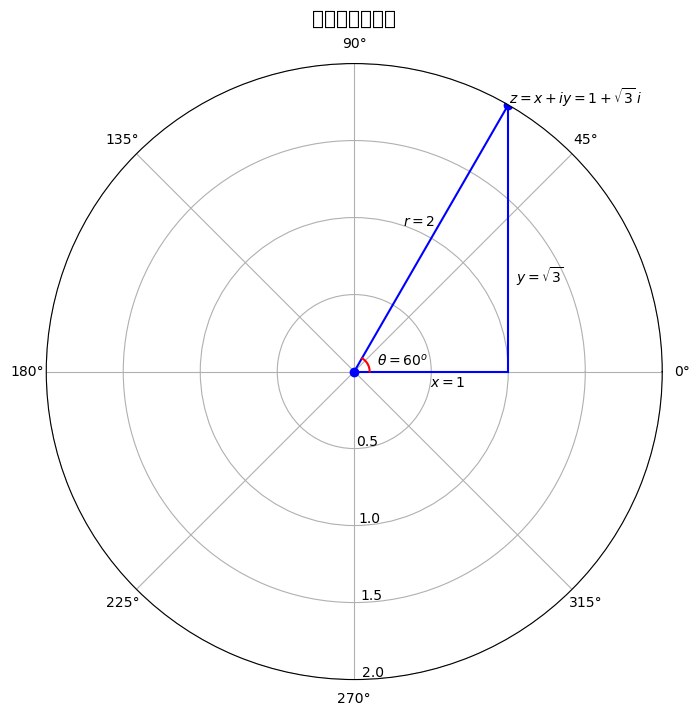

In [2]:
# 缩写有用的值和函数
π = np.pi

# 设置参数
r = 2
θ = π/3
x = r * np.cos(θ)
x_range = np.linspace(0, x, 1000)
θ_range = np.linspace(0, θ, 1000)

# 绘图
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')

ax.plot((0, θ), (0, r), marker='o', color='b')          # 绘制 r
ax.plot(np.zeros(x_range.shape), x_range, color='b')       # 绘制 x
ax.plot(θ_range, x / np.cos(θ_range), color='b')        # 绘制 y
ax.plot(θ_range, np.full(θ_range.shape, 0.1), color='r')  # 绘制 θ

ax.margins(0) # 让图从原点开始

ax.set_title("复数的三角函数", va='bottom',
    fontsize='x-large')

ax.set_rmax(2)
ax.set_rticks((0.5, 1, 1.5, 2))  # 更少的径向刻度
ax.set_rlabel_position(-88.5)    # 让径向标签远离绘制线

ax.text(θ, r+0.01 , r'$z = x + iy = 1 + \sqrt{3}\, i$')   # 标记 z
ax.text(θ+0.2, 1 , '$r = 2$')                             # 标记 r
ax.text(0-0.2, 0.5, '$x = 1$')                            # 标记 x
ax.text(0.5, 1.2, r'$y = \sqrt{3}$')                      # 标记 y
ax.text(0.25, 0.15, r'$\theta = 60^o$')                   # 标记 θ

ax.grid(True)
plt.show()

In [3]:
# 设置参数
r = 0.9
θ = π/4
x0 = 4
x1 = 2 * r * sqrt(2)

# 定义需要计算的符号
ω, p = symbols('ω p', real=True)

# 求解 ω
## 注意：我们选择接近0的解
eq1 = Eq(x1/x0 - r * cos(ω+θ) / cos(ω), 0)
ω = nsolve(eq1, ω, 0)
ω = float(ω)
print(f'ω = {ω:1.3f}')

# 求解 p
eq2 = Eq(x0 - 2 * p * cos(ω), 0)
p = nsolve(eq2, p, 0)
p = float(p)
print(f'p = {p:1.3f}')

ω = 0.000
p = 2.000


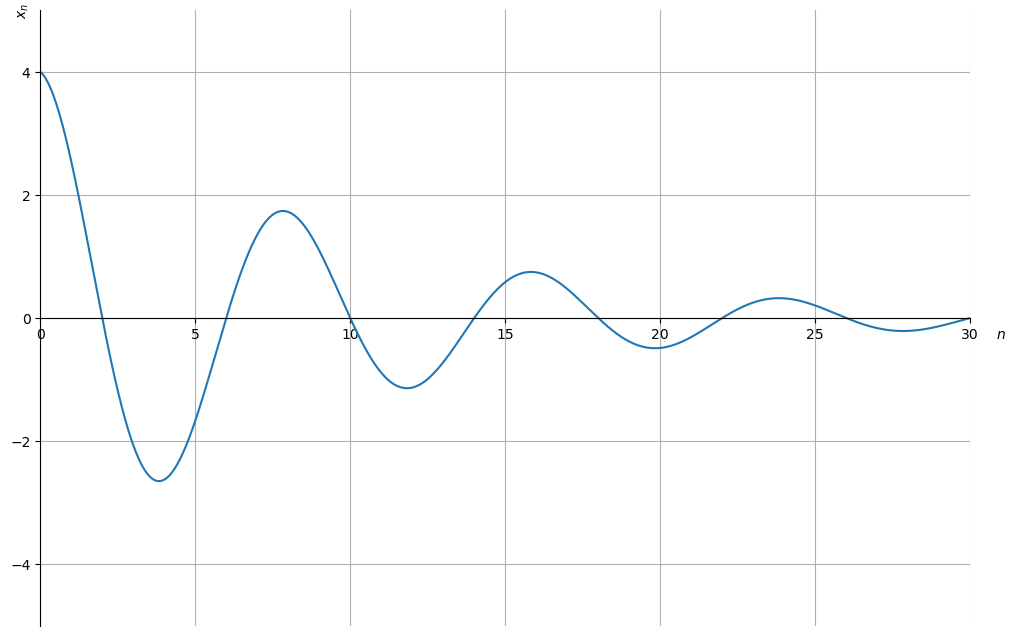

In [4]:
# 定义 n 的范围
max_n = 30
n = np.arange(0, max_n+1, 0.01)

# 定义 x_n
x = lambda n: 2 * p * r**n * np.cos(ω + n * θ)

# 绘图
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(n, x(n))
ax.set(xlim=(0, max_n), ylim=(-5, 5), xlabel='$n$', ylabel='$x_n$')

# 设置 x 轴在图中央
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ticklab = ax.xaxis.get_ticklabels()[0] # 设置 x 标签位置
trans = ticklab.get_transform()
ax.xaxis.set_label_coords(31, 0, transform=trans)

ticklab = ax.yaxis.get_ticklabels()[0] # 设置 y 标签位置
trans = ticklab.get_transform()
ax.yaxis.set_label_coords(0, 5, transform=trans)

ax.grid()
plt.show()

In [5]:
# 定义符号
ω, θ = symbols('ω θ', real=True)

# 验证
print("cos(ω)cos(θ) - sin(ω)sin(θ) =",
    simplify(cos(ω)*cos(θ) - sin(ω) * sin(θ)))
print("cos(ω)sin(θ) + sin(ω)cos(θ) =",
    simplify(cos(ω)*sin(θ) + sin(ω) * cos(θ)))

cos(ω)cos(θ) - sin(ω)sin(θ) = cos(θ + ω)
cos(ω)sin(θ) + sin(ω)cos(θ) = sin(θ + ω)


In [6]:
# 设置初始打印
init_printing(use_latex="mathjax")

ω = Symbol('ω')
print('cos(ω)sin(ω) 积分的解析解为:')
integrate(cos(ω) * sin(ω), ω)

cos(ω)sin(ω) 积分的解析解为:


   2   
sin (ω)
───────
   2   

In [7]:
print('cos(ω)sin(ω) 从 -π 到 π 积分的数值解为:')
integrate(cos(ω) * sin(ω), (ω, -π, π))

cos(ω)sin(ω) 从 -π 到 π 积分的数值解为:


0

In [8]:
# 从 sympy 导入符号 π
from sympy import pi

In [9]:
print('cos(ω)**2 从 -π 到 π 积分的解析解为:')

integrate(cos(ω)**2, (ω, -pi, pi))

cos(ω)**2 从 -π 到 π 积分的解析解为:


π

In [10]:
print('sin(ω)**2 从 -π 到 π 积分的解析解为:')

integrate(sin(ω)**2, (ω, -pi, pi))

sin(ω)**2 从 -π 到 π 积分的解析解为:


π